In [1]:
import signac
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

project = signac.get_project(root='../')
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.head()

,L,NPROCS,T,data_dump_interval,job_type,trials,_status,analysis_time,analysis_time_sem,ete_analysis_time,ete_simulation_time,modify_time,read_frames_time,root,signac_id,simulation_time,statepoint,transfer_time
074839d0d83171d97bdfae508b32efc2,15,1,1,1000,plumed_sequential,4,{'a4md/074839d0/initialize/0000/fa38588fd1b176...,12.173854,0.005028,13.112,31.691210,13.05000,NaN,/home/sthomas/projects/a4md/project/workspace,074839d0d83171d97bdfae508b32efc2,14.44871,"{'NPROCS': 1, 'T': 1, 'L': 15, 'data_dump_inte...",0.938146
07cb80298adb0e83801ea4a5555b597c,15,1,1,1000,plumed_sequential,1,{'a4md/07cb8029/initialize/0000/481d24ea8a3fe2...,12.224005,0.004108,13.208,31.285441,13.17400,NaN,/home/sthomas/projects/a4md/project/workspace,07cb80298adb0e83801ea4a5555b597c,14.48724,"{'NPROCS': 1, 'T': 1, 'L': 15, 'data_dump_inte...",0.983995
1d5939f581a09f42700cbba75b351fbe,15,1,1,10000,traditional,4,{'a4md/1d5939f5/initialize/0000/e45ab7c71a28b6...,1.807308,0.026050,NaN,18.317953,0.61769,0.153521,/home/sthomas/projects/a4md/project/workspace,1d5939f581a09f42700cbba75b351fbe,14.55504,"{'NPROCS': 1, 'T': 1, 'L': 15, 'data_dump_inte...",0.153521
22c46fb84151100326e258aa27b39b86,15,1,1,10000,plumed_sequential,5,{'a4md/22c46fb8/initialize/0000/b20531252c5c16...,1.843293,0.021751,2.423,21.417606,2.37220,NaN,/home/sthomas/projects/a4md/project/workspace,22c46fb84151100326e258aa27b39b86,14.74055,"{'NPROCS': 1, 'T': 1, 'L': 15, 'data_dump_inte...",0.579707
2ffbace23b994e0744dcf97ab4721fe6,15,1,1,1000,plumed_sequential,2,{'a4md/2ffbace2/initialize/0000/f0e849bb5e13ca...,12.205382,0.004442,13.336,31.480388,13.29900,NaN,/home/sthomas/projects/a4md/project/workspace,2ffbace23b994e0744dcf97ab4721fe6,14.52266,"{'NPROCS': 1, 'T': 1, 'L': 15, 'data_dump_inte...",1.130618


Text(0,0.5,'Transfer Time (s)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

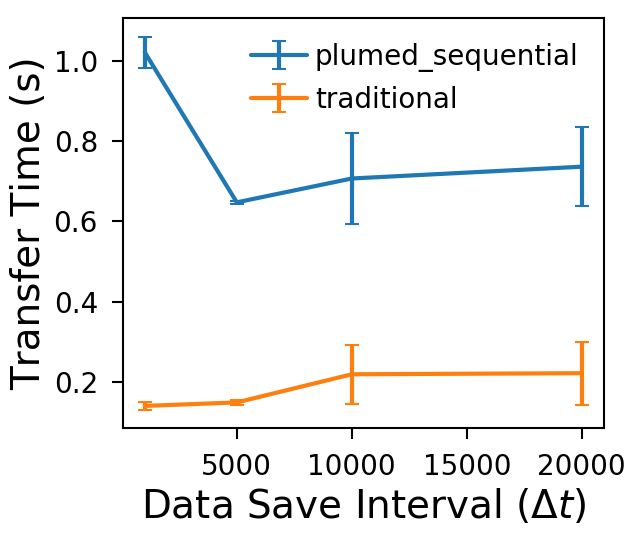

In [2]:
for i,(job_type,df_job_type_grp) in enumerate(df.groupby('job_type')):
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.transfer_time.mean())
        #print(df_grp.ete_simulation_time)
        a_times_sem.append(df_grp.transfer_time.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    plt.errorbar(dump_intervals,
                 a_times,
                 a_times_sem,
                 capsize=5,
                 label=job_type)
plt.legend(fontsize=20)
plt.xlabel('Data Save Interval ($\Delta t$)')
plt.ylabel('Transfer Time (s)')

Text(0,0.5,'Analysis Time (s)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

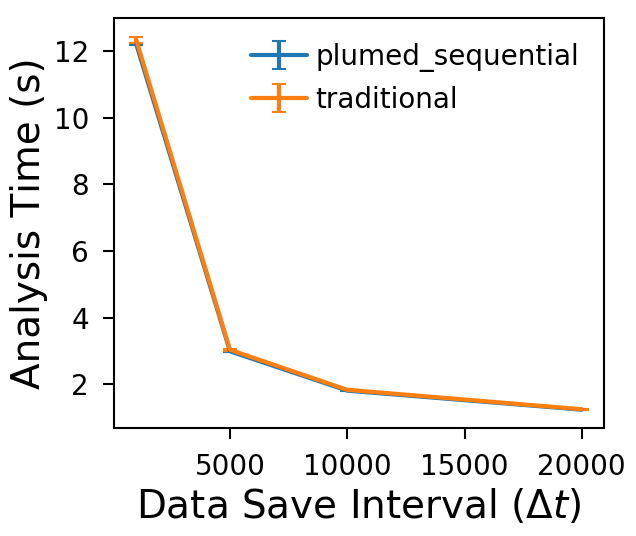

In [3]:
for i,(job_type,df_job_type_grp) in enumerate(df.groupby('job_type')):
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.analysis_time.mean())
        #print(df_grp.ete_simulation_time)
        a_times_sem.append(df_grp.analysis_time.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    plt.errorbar(dump_intervals,
                 a_times,
                 a_times_sem,
                 capsize=5,
                 label=job_type)
plt.legend(fontsize=20)
plt.xlabel('Data Save Interval ($\Delta t$)')
plt.ylabel('Analysis Time (s)')

Text(0,0.5,'Time (s)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

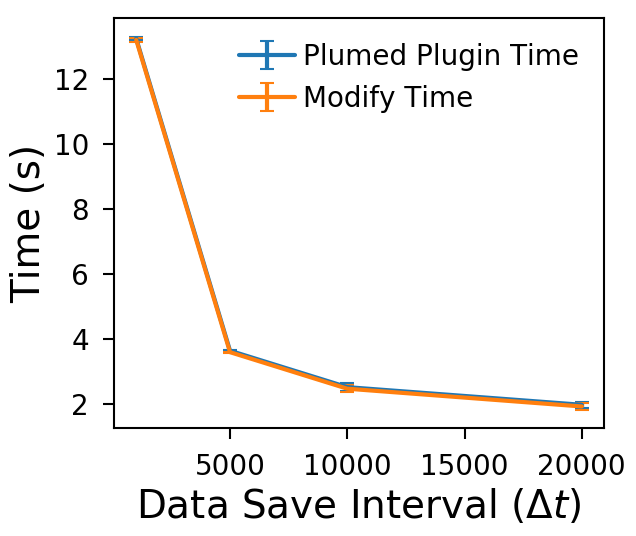

In [9]:
for i,(job_type,df_job_type_grp) in enumerate(df.groupby('job_type')):
    if 'plumed' in job_type:
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            a_times.append(df_grp.ete_analysis_time.mean())
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.ete_analysis_time.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        plt.errorbar(dump_intervals,
                     a_times,
                     a_times_sem,
                     capsize=5,
                     label='Plumed Plugin Time')
    
for i,(job_type,df_job_type_grp) in enumerate(df.groupby('job_type')):
    if 'plumed' in job_type:
        dump_intervals = []
        a_times = []
        a_times_sem = []
        for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
            a_times.append(df_grp.modify_time.mean())
            #print(df_grp.ete_simulation_time)
            a_times_sem.append(df_grp.modify_time.sem())
            dump_intervals.append(ddi)
            #print(a_times_sem)
        plt.errorbar(dump_intervals,
                     a_times,
                     a_times_sem,
                     capsize=5,
                     label='Modify Time')

plt.legend(fontsize=20)
plt.xlabel('Data Save Interval ($\Delta t$)')
plt.ylabel('Time (s)')

Text(0,0.5,'Modify Time (s)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

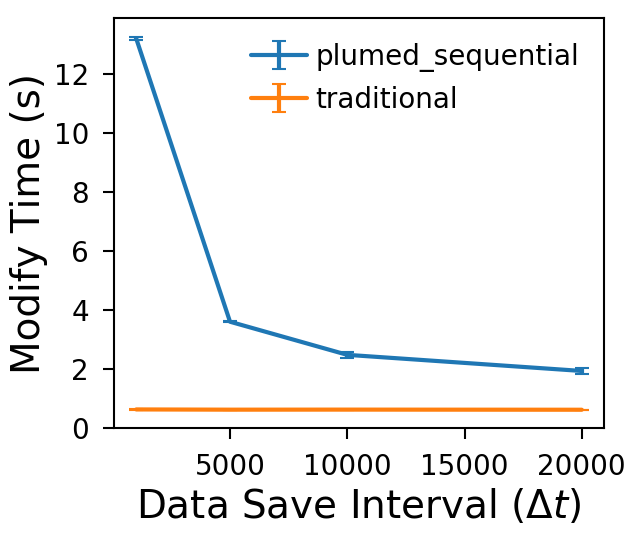

In [5]:
for i,(job_type,df_job_type_grp) in enumerate(df.groupby('job_type')):
    
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.modify_time.mean())
        #print(df_grp.ete_simulation_time)
        a_times_sem.append(df_grp.modify_time.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    plt.errorbar(dump_intervals,
                 a_times,
                 a_times_sem,
                 capsize=5,
                 label=job_type)

plt.legend(fontsize=20)
plt.xlabel('Data Save Interval ($\Delta t$)')
plt.ylabel('Modify Time (s)')

Text(0,0.5,'Simulation Time (s)')

/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure i

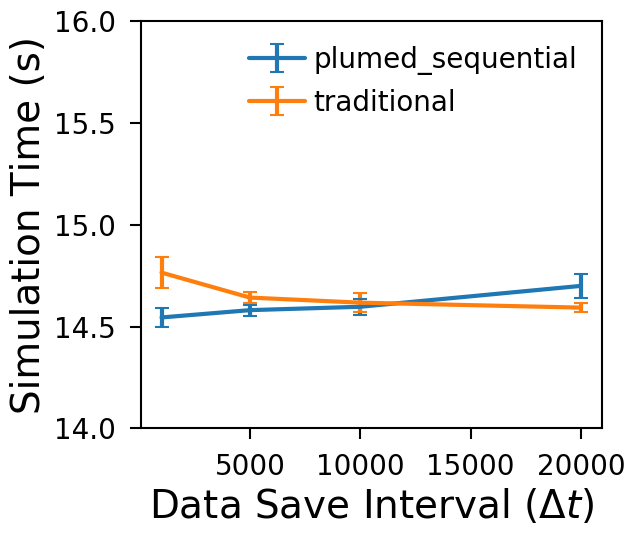

In [8]:
for i,(job_type,df_job_type_grp) in enumerate(df.groupby('job_type')):
    
    dump_intervals = []
    a_times = []
    a_times_sem = []
    for j,(ddi,df_grp) in enumerate(df_job_type_grp.groupby('data_dump_interval')):
        a_times.append(df_grp.simulation_time.mean())
        #print(df_grp.ete_simulation_time)
        a_times_sem.append(df_grp.simulation_time.sem())
        dump_intervals.append(ddi)
        #print(a_times_sem)
    plt.errorbar(dump_intervals,
                 a_times,
                 a_times_sem,
                 capsize=5,
                 label=job_type)

plt.legend(fontsize=20)
plt.ylim(14,16)
plt.xlabel('Data Save Interval ($\Delta t$)')
plt.ylabel('Simulation Time (s)')